In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split

### 패션 MINST 데이터

In [2]:
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

### 합성곱 신경망 만들기 

In [3]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
          padding='same', input_shape=(28,28,1)))   # 첫번째 합성곱

model.add(keras.layers.MaxPooling2D(2))  ## 풀링

model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu',
          padding='same'))                         # 두번째 합성곱
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________

### 모델 컴파일과 훈련 

In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('models/best-cnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 48000 samples, validate on 12000 samples


2021-12-03 13:10:16.189142: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA


Epoch 1/20
48000/48000 [==============================] - 38s 800us/sample - loss: 0.5082 - acc: 0.8195 - val_loss: 0.3204 - val_acc: 0.8797
Epoch 2/20
48000/48000 [==============================] - 36s 757us/sample - loss: 0.3319 - acc: 0.8810 - val_loss: 0.2827 - val_acc: 0.8949
Epoch 3/20
48000/48000 [==============================] - 37s 766us/sample - loss: 0.2834 - acc: 0.8966 - val_loss: 0.2527 - val_acc: 0.9041
Epoch 4/20
48000/48000 [==============================] - 37s 764us/sample - loss: 0.2520 - acc: 0.9073 - val_loss: 0.2356 - val_acc: 0.9138
Epoch 5/20
48000/48000 [==============================] - 38s 784us/sample - loss: 0.2277 - acc: 0.9160 - val_loss: 0.2224 - val_acc: 0.9149
Epoch 6/20
48000/48000 [==============================] - 36s 753us/sample - loss: 0.2085 - acc: 0.9229 - val_loss: 0.2216 - val_acc: 0.9179
Epoch 7/20
48000/48000 [==============================] - 37s 768us/sample - loss: 0.1928 - acc: 0.9278 - val_loss: 0.2094 - val_acc: 0.9216
Epoch 8/20
48

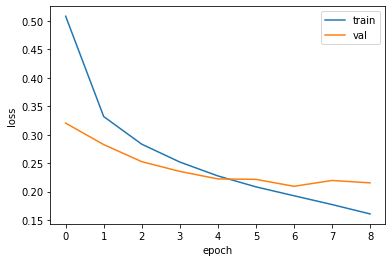

In [5]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [6]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[1.3743452e-16 3.2106752e-22 1.0783409e-16 1.5429147e-16 5.2153323e-13
  8.7272094e-17 2.4169211e-14 2.2053713e-18 1.0000000e+00 6.1283182e-21]]


In [7]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']
 
classes[np.argmax(preds)]

'가방'